## Linguistic Evaluation

### distilgpt2

In [21]:
eval_files = [
    "outputs/test_rd/eval_table_rd.csv",
    #"outputs/base/eval_table_base.csv",
    "outputs/distilgpt2/gen0/eval_table_gen0.csv",
    "outputs/distilgpt2/gen1/eval_table_gen1.csv",
    "outputs/distilgpt2/gen2/eval_table_gen2.csv",
    "outputs/distilgpt2/gen3/eval_table_gen3.csv",
    "outputs/distilgpt2/gen4/eval_table_gen4.csv",
    "outputs/distilgpt2/gen5/eval_table_gen5.csv",
    "outputs/distilgpt2/gen6/eval_table_gen6.csv",
    "outputs/distilgpt2/gen7/eval_table_gen7.csv"
]

columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

#process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )
process_and_plot_csv_data_with_legend(eval_files, columns, "linguistic", "evaluation" )

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/test_rd/eval_table_rd.csv'

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.198648    0.221848   0.247982  0.155126  0.410511  0.307847   
GEN0    0.214225    0.249755   0.279120  0.199715  0.384645  0.350182   
GEN1    0.082420    0.077315   0.204846  0.154817  0.339579  0.145568   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.151607  0.294443  
GEN0  0.182166  0.324921  
GEN1  0.061230  0.121491  


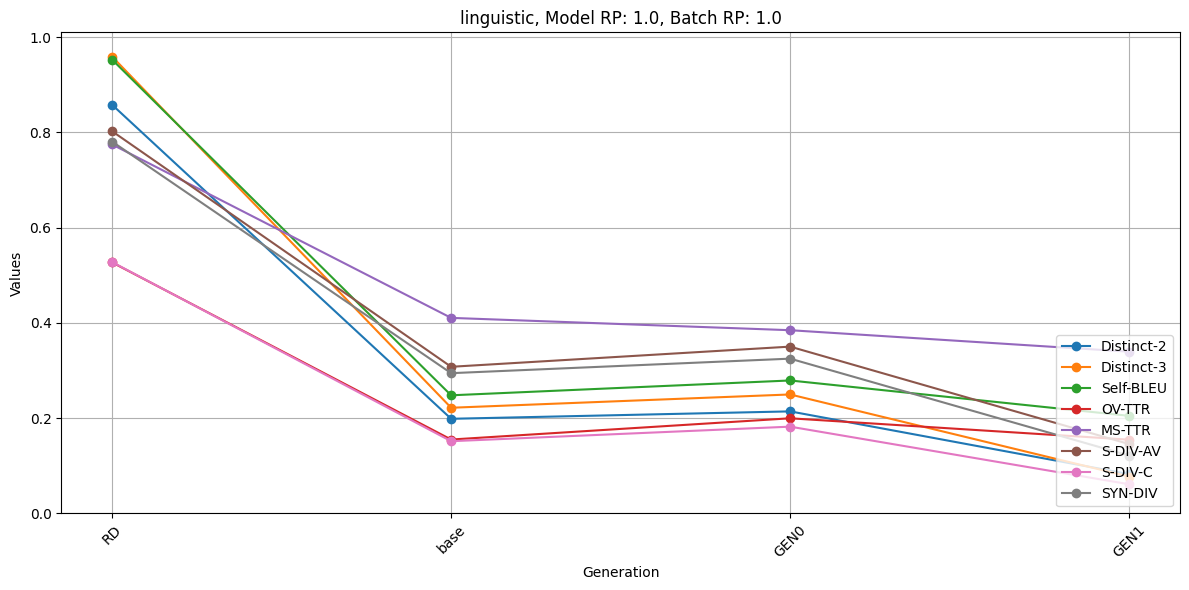

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.543964    0.599569   0.559459  0.389368  0.648793  0.625971   
GEN0    0.749251    0.830058   0.787596  0.489398  0.699759  0.726459   
GEN1    0.140338    0.155797   0.237058  0.157955  0.384337  0.302339   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.365771  0.616454  
GEN0  0.471105  0.700807  
GEN1  0.152870  0.268519  


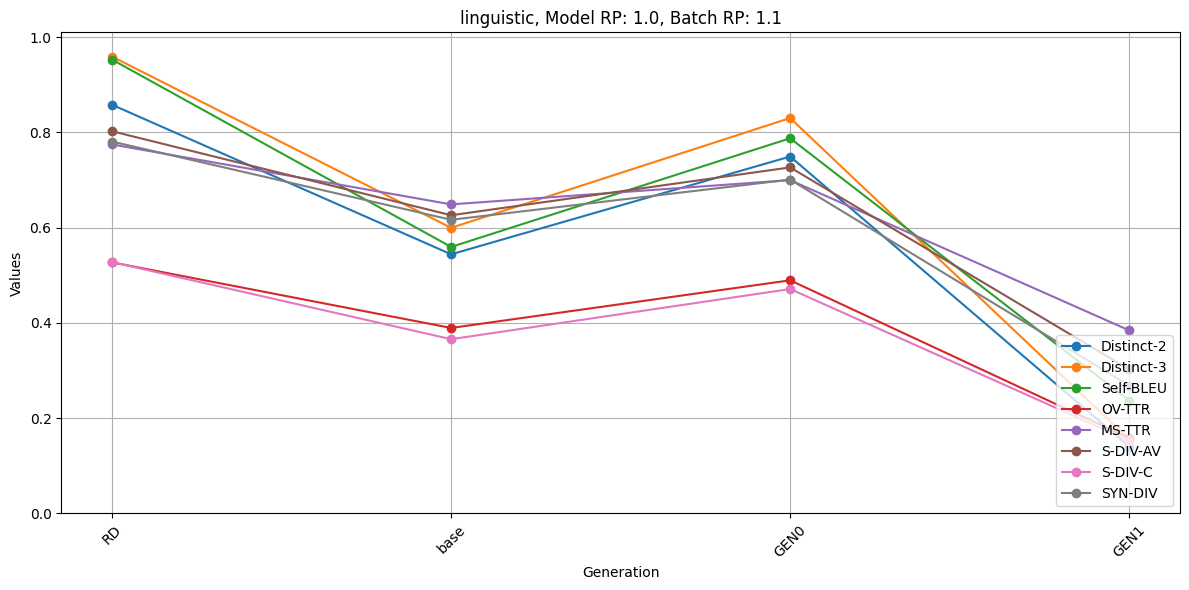

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.198648    0.221848   0.247982  0.155126  0.410511  0.307847   
GEN0    0.214225    0.249755   0.279120  0.199715  0.384645  0.350182   
GEN1    0.177748    0.194252   0.241021  0.190368  0.389738  0.302494   
GEN2    0.137715    0.147506   0.491377  0.331172  0.511299  0.336263   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.151607  0.294443  
GEN0  0.182166  0.324921  
GEN1  0.152560  0.258466  
GEN2  0.126321  0.216983  


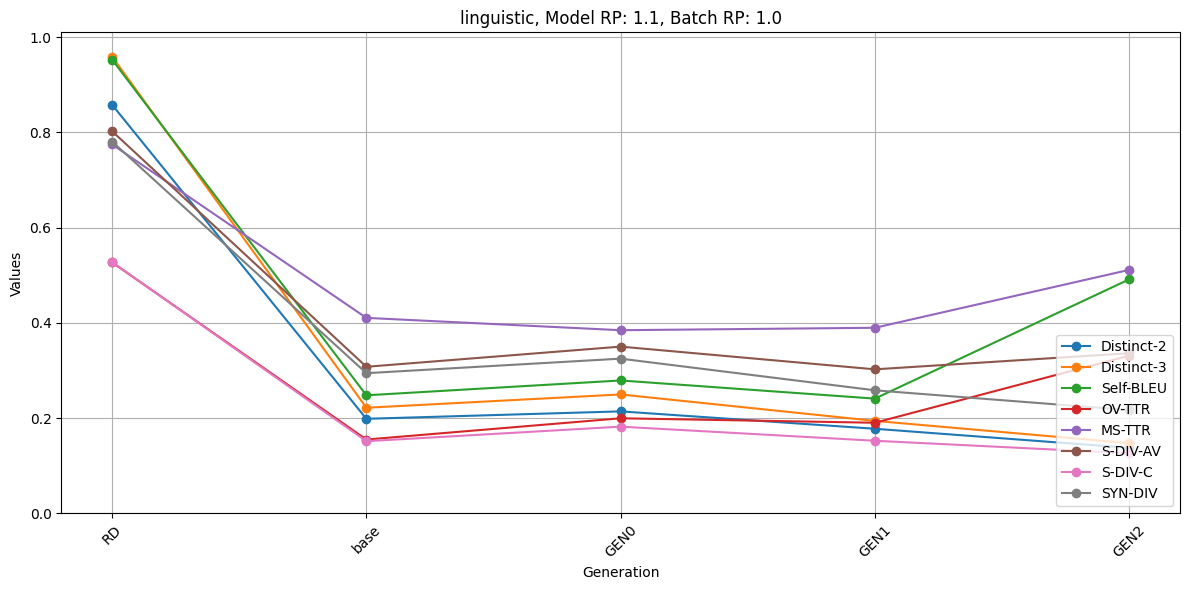

      Distinct-2  Distinct-3  Self-BLEU    OV-TTR    MS-TTR  S-DIV-AV  \
RD      0.857847    0.958945   0.952630  0.526975  0.774601  0.802330   
base    0.543964    0.599569   0.559459  0.389368  0.648793  0.625971   
GEN0    0.749251    0.830058   0.787596  0.489398  0.699759  0.726459   
GEN1    0.599506    0.646478   0.683170  0.438999  0.635503  0.662195   
GEN2    0.436251    0.459409   0.697603  0.494795  0.651739  0.610165   

       S-DIV-C   SYN-DIV  
RD    0.527642  0.780589  
base  0.365771  0.616454  
GEN0  0.471105  0.700807  
GEN1  0.396208  0.596173  
GEN2  0.298146  0.461146  


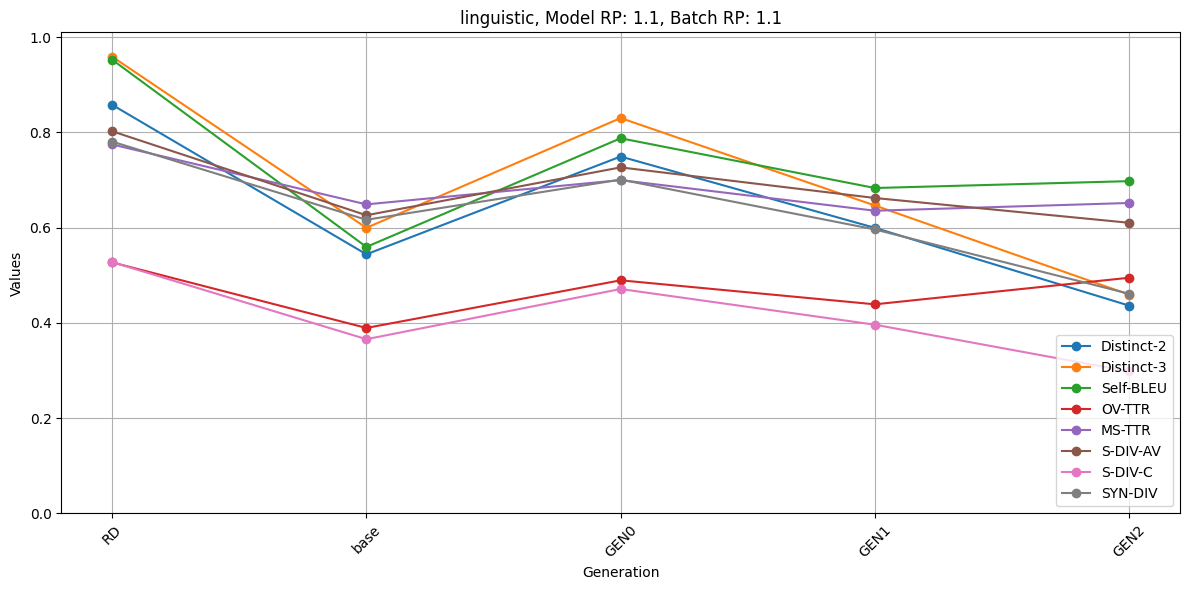

In [1]:
from tools.plotting_tools import process_and_plot_csv_data_with_legend

eval_files = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.0/lg_eval_table_gen1_rp1.0.csv",
    #"outputs/opt125m/gen2/eval_table_gen2.csv",
    #"outputs/opt125m/gen3/eval_table_gen3.csv",
    #"outputs/opt125m/gen4/eval_table_gen4.csv",
    #"outputs/opt125m/gen5/eval_table_gen5.csv",
    #"outputs/opt125m/gen6/eval_table_gen6.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

eval_files2 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.0/lg_eval_table_gen1_rp1.1.csv",
    #"outputs/opt125m/gen2/eval_table_gen2.csv",
    #"outputs/opt125m/gen3/eval_table_gen3.csv",
    #"outputs/opt125m/gen4/eval_table_gen4.csv",
    #"outputs/opt125m/gen5/eval_table_gen5.csv",
    #"outputs/opt125m/gen6/eval_table_gen6.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

eval_files3 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.1/lg_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.1/lg_eval_table_gen2_rp1.0.csv",
    #"outputs/opt125m/gen3/eval_table_gen3.csv",
    #"outputs/opt125m/gen4/eval_table_gen4.csv",
    #"outputs/opt125m/gen5/eval_table_gen5.csv",
    #"outputs/opt125m/gen6/eval_table_gen6.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]

eval_files4 = [
    "outputs/test_rd/lg_eval_table_rd.csv",
    "outputs/opt125m/base/lg_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/lg_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.1/lg_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.1/lg_eval_table_gen2_rp1.1.csv",
    #"outputs/opt125m/gen3/eval_table_gen3.csv",
    #"outputs/opt125m/gen4/eval_table_gen4.csv",
    #"outputs/opt125m/gen5/eval_table_gen5.csv",
    #"outputs/opt125m/gen6/eval_table_gen6.csv",
    #"outputs/opt125m/gen7/eval_table_gen7.csv"
]



columns = ["Distinct-2", "Distinct-3", "Self-BLEU", "OV-TTR", "MS-TTR", "S-DIV-AV", "S-DIV-C", "SYN-DIV"]

#process_and_plot_csv_data_with_base(eval_files, columns, "linguistic", "evaluation" )
process_and_plot_csv_data_with_legend(eval_files, columns, "linguistic", "evaluation", 1.0, 1.0)
process_and_plot_csv_data_with_legend(eval_files2, columns, "linguistic", "evaluation", 1.0, 1.1)
process_and_plot_csv_data_with_legend(eval_files3, columns, "linguistic", "evaluation", 1.1, 1.0)
process_and_plot_csv_data_with_legend(eval_files4, columns, "linguistic", "evaluation", 1.1, 1.1)

## Creativity/Originality Evaluation

1. MS-Jaccard

This metric measures diversity by calculating the Jaccard similarity between the n-grams of each generated story and every other story in the dataset.  
Using a pseudocount of 0.5 is an interesting choice for your specific use case where the primary objective is to investigate the differences in similarity scores between various generations of synthetic text and a base of human texts. This choice is particularly insightful because it moderates the impact of n-grams that do not overlap between the sets, providing a more stable and "neutral" base score, rather than skewing the results dramatically towards zero. This could help in achieving a more balanced comparison across model generations.
Rationale for Using 0.5 as a Pseudocount

    Balanced Impact: A pseudocount of 0.5 helps in ensuring that missing n-grams don't completely nullify the similarity scores, but rather contribute a moderate base value to the geometric mean calculation. This is beneficial in cases where you expect some level of inherent dissimilarity due to generational changes in model outputs but want to prevent those differences from being exaggerated by zeros.
    Neutral Base Score: By setting the pseudocount to 0.5, the impact of each missing n-gram on the overall score is effectively neutralized, enabling a focus on the n-grams that do exist in both sets. This approach ensures that the similarity score reflects meaningful linguistic features present in both texts rather than being overly penalized for differences.  

2. Feature-based Similarity

We will use a pre-trained model (like BERT) to extract embeddings for the stories and then compute cosine similarities between these embeddings to measure how diverse the stories are in terms of semantic content.  

3. Fluency: This metric assesses the quantity of relevant ideas generated. In text, this can be translated to the number of relevant responses or ideas mentioned.

4. Flexibility: This measures the variety of ideas or categories used. In text, it evaluates how many different themes or subjects are touched upon.

5. Originality: This evaluates the uniqueness of the ideas relative to a typical response. It often requires a larger dataset to determine what counts as "typical."

### **Flexibility**
#### **Assisting Data** : Keywords Categories
First, we create a dictionary that organizes words from the RD test file into thematic categories. We follow a process of topic modeling or clustering. Topic modeling, specifically Latent Dirichlet Allocation (LDA), helps identify latent topics in text by clustering words that commonly appear together.
This method provides a basic categorization of the text into themes without explicit labels. Each topic will be named as topic_0, topic_1, etc., and the associated keywords represent the thematic categories.  
  
We intentionally employ the prompt file for this purpose, believing that this approach establishes a nuanced connection between the flexibility metric and the literary themes intended by the prompts. This connection enhances the metric's relevance, aligning it more closely with how a human would assess creative text.

### **Originality**
#### **Assisting Data** : Frequency Reference Corpus
We create a frequency reference corpus from the RD test source (containing human stories) calculating the frequency of each word. The frequencies will then be normalized to represent the proportion of each word's occurrence compared to the entire corpus.

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.398439           0.737555  0.178515     0.384950     0.473637
GEN0       0.419967           0.706172  0.242100     0.441400     0.462506
GEN1       0.400941           0.633005  0.906931     0.249307     0.488942


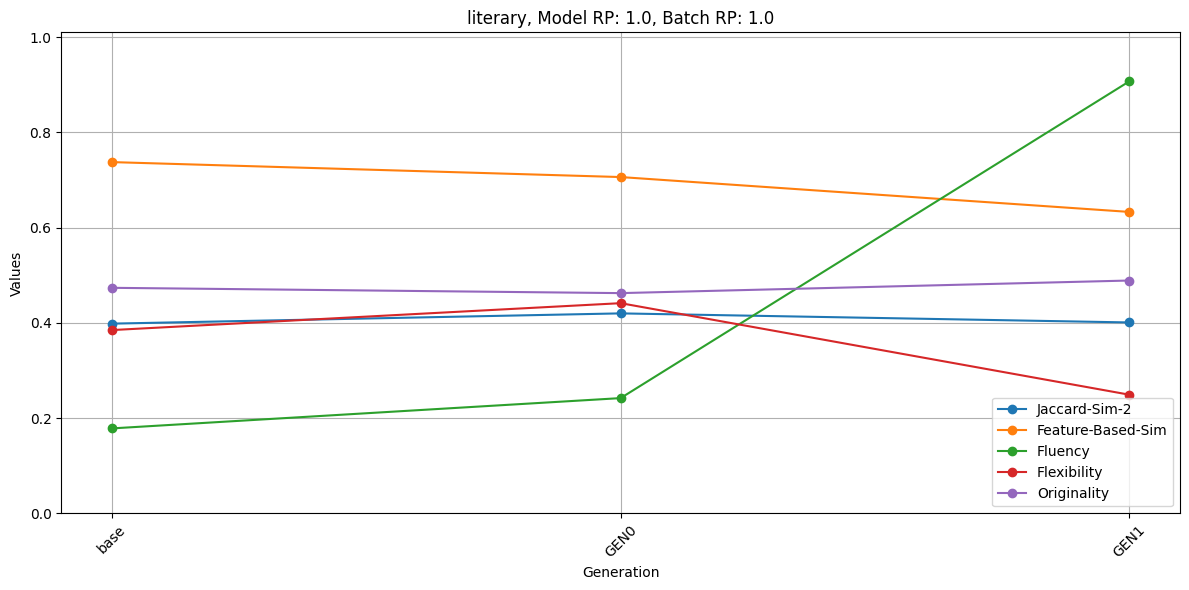

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.416604           0.813849  0.653364     0.683364     0.571428
GEN0       0.459777           0.838054  0.985000     0.801176     0.555424
GEN1       0.408498           0.713784  0.192574     0.405347     0.460204


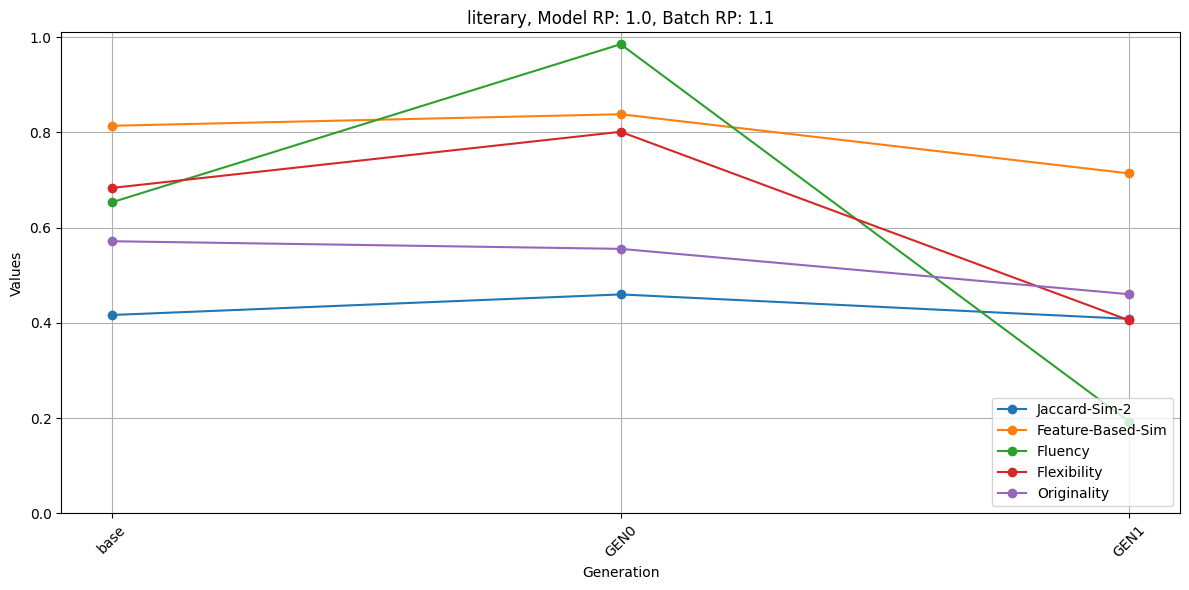

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.398439           0.737555  0.178515      0.38495     0.473637
GEN0       0.419967           0.706172  0.242100      0.44140     0.462506
GEN1       0.413686           0.665521  0.200700      0.38120     0.450625
GEN2       0.414429           0.554824  0.185700      0.32270     0.628661


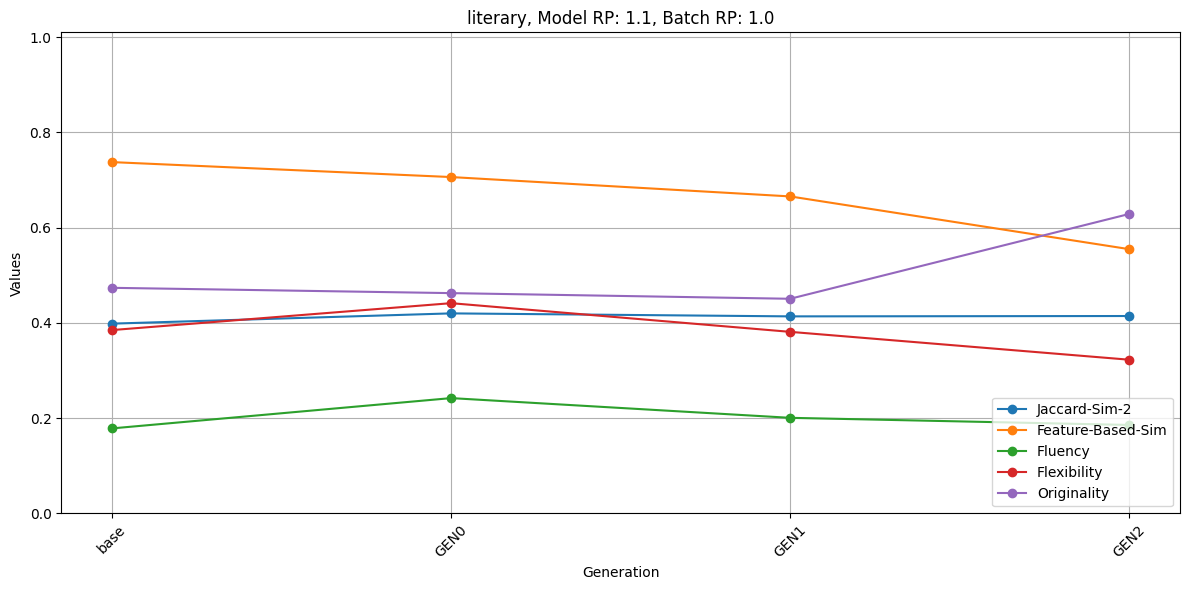

      Jaccard-Sim-2  Feature-Based-Sim   Fluency  Flexibility  Originality
base       0.416604           0.813849  0.653364     0.683364     0.571428
GEN0       0.459777           0.838054  0.985000     0.801176     0.555424
GEN1       0.443096           0.783590  0.828800     0.722900     0.558647
GEN2       0.431812           0.638572  0.608900     0.551400     0.622342


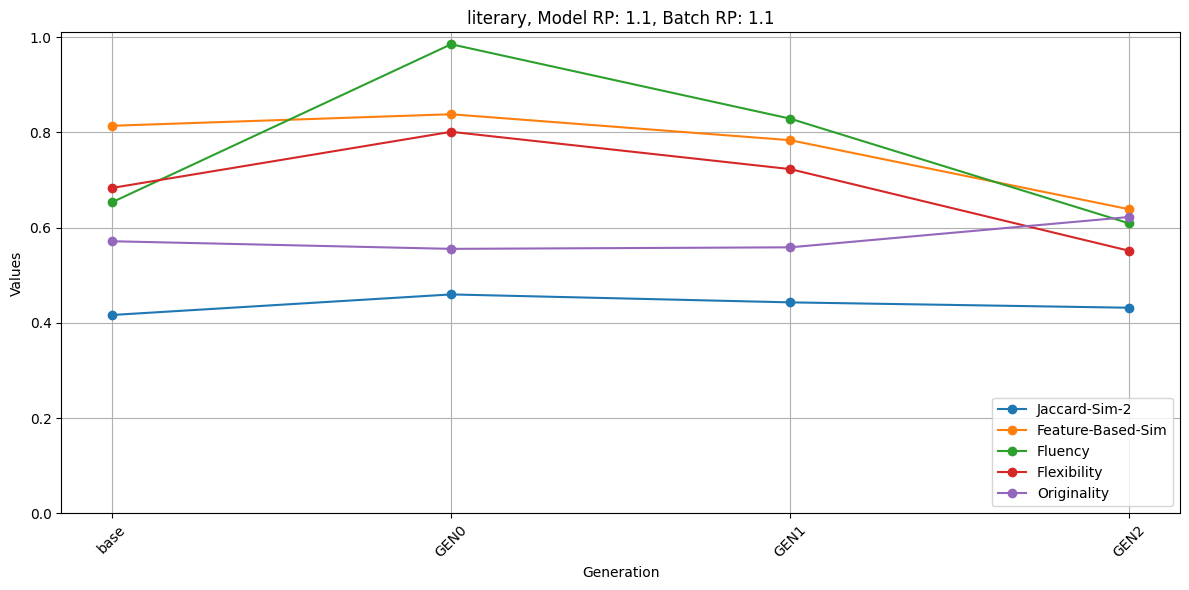

In [3]:
from tools.plotting_tools import process_and_plot_csv_data_with_legend_ltr

columns2 = ["Jaccard-Sim-2", "Feature-Based-Sim", "Fluency", "Flexibility", "Originality"]

eval_files = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.0/ltr_eval_table_gen1_rp1.0.csv",
    # "outputs/gen2/eval_table_gen2_2.csv",
    # "outputs/gen3/eval_table_gen3_2.csv",
    # "outputs/gen4/eval_table_gen4_2.csv",
    # "outputs/gen5/eval_table_gen5_2.csv",
    # "outputs/gen6/eval_table_gen6_2.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]

eval_files2 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.0/ltr_eval_table_gen1_rp1.1.csv",
    # "outputs/gen2/eval_table_gen2_2.csv",
    # "outputs/gen3/eval_table_gen3_2.csv",
    # "outputs/gen4/eval_table_gen4_2.csv",
    # "outputs/gen5/eval_table_gen5_2.csv",
    # "outputs/gen6/eval_table_gen6_2.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]


eval_files3 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.0.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.0.csv",
    "outputs/opt125m/gen1_1.1/ltr_eval_table_gen1_rp1.0.csv",
    "outputs/opt125m/gen2_1.1/ltr_eval_table_gen2_rp1.0.csv",
    # "outputs/gen3/eval_table_gen3_2.csv",
    # "outputs/gen4/eval_table_gen4_2.csv",
    # "outputs/gen5/eval_table_gen5_2.csv",
    # "outputs/gen6/eval_table_gen6_2.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]

eval_files4 = [
    "outputs/opt125m/base/ltr_eval_table_base_rp1.1.csv",
    "outputs/opt125m/gen0/ltr_eval_table_gen0_rp1.1.csv",
    "outputs/opt125m/gen1_1.1/ltr_eval_table_gen1_rp1.1.csv",
    "outputs/opt125m/gen2_1.1/ltr_eval_table_gen2_rp1.1.csv"
    # "outputs/gen3/eval_table_gen3_2.csv",
    # "outputs/gen4/eval_table_gen4_2.csv",
    # "outputs/gen5/eval_table_gen5_2.csv",
    # "outputs/gen6/eval_table_gen6_2.csv",
    # "outputs/gen7/eval_table_gen7_2.csv"
]


#process_and_plot_csv_data_with_base(eval_files2, columns2, "creativity", "evaluation")
process_and_plot_csv_data_with_legend_ltr(eval_files, columns2, "literary", "evaluation", 1.0, 1.0)
process_and_plot_csv_data_with_legend_ltr(eval_files2, columns2, "literary", "evaluation", 1.0, 1.1)
process_and_plot_csv_data_with_legend_ltr(eval_files3, columns2, "literary", "evaluation", 1.1, 1.0)
process_and_plot_csv_data_with_legend_ltr(eval_files4, columns2, "literary", "evaluation", 1.1, 1.1)